In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Steps involved in the detection include:
1.	Data Loading
2.	Data Exploration and Cleansing
3.	Data Pre-Processing using 
    *   Stopwords Removals
    *   Stemming and tokenization
    *   Feature extractions using TF-IDF vectorizer
4.	Model Building and training 
    *   Training using SVM
    *   Training using Passive Agressive Classifier
    *   Training using Naive Bayes Classifier
5.  Model Testing and Evaluation


# Data Loading

In [2]:
#importation of libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Applied AI/news.csv')


# Data exploration and cleansing

In [4]:
df.shape #get shape of data

(6335, 4)

In [5]:
df.info() # data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# rename columns and drop id column
df.columns = ['id', 'title', 'text', 'label']
df.drop(['id'], axis=1, inplace=True)

In [8]:
#check if there are null values in the dataframe
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [9]:
#check the label distribution
df.groupby('label')['label'].count()

label
FAKE    3164
REAL    3171
Name: label, dtype: int64

In [10]:
#check for null values in data frame
df['text'].isnull().values.any()

False

<Axes: title={'center': 'Label Type'}, xlabel='label'>

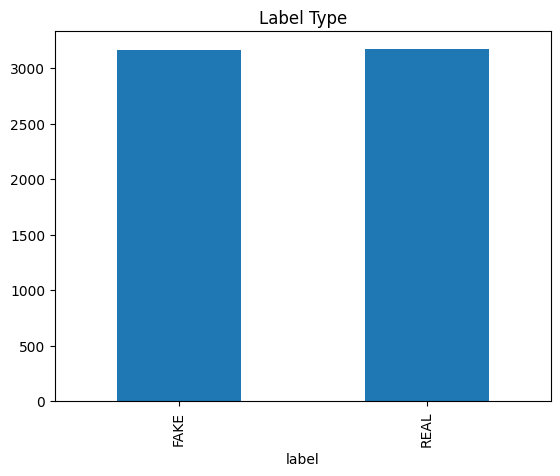

In [11]:
#visulize the target variable
df.groupby("label")['label'].count().plot.bar(title = "Label Type")

In [12]:

plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(df['title'][:10], df['text'][:10])
plt.title('Title vs Text')
plt.xlabel('Title')
plt.ylabel('Text')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
df['text_merge'] = df['title'] + ' ' + df['text'] # merge text and title columns

In [14]:
df

,title,text,label,text_merge
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se..."


# Data pre-processing

In [15]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess

Remove stopwords

In [16]:
#declare stop words stop words do not have much meaning to a sentence
#Apply Stop words to remove most frequent english words as they do not add much meaning to a sentence

nltk.download('stopwords')

stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#assign joined processed text to a new column 
#df['processed_title'] = df['title'].apply(preprocess)
df['processed_text_merge'] = df['text_merge'].apply(preprocess)
df['processed_text_merge'] = df['processed_text_merge'].apply(lambda x:" ".join(x))
#print(df['processed_title'][0])
print(df['processed_text_merge'][0])

smell hillary fear daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown election ought retired unprecedented nominee major political party war fbi exactly hillary people coma patients waking watching hour cnn hospital beds assume fbi director james comey hillary opponent election fbi attack obama cnn hillary people circulated letter attacking comey currently media hit pieces lambasting targeting trump surprising clintons allies start running attack ads fbi fbi leadership warned entire left wing establishment form lynch mob continue going hillary fbi credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obama doj people gone explosively public new york times compared comey edgar hoover bizarre headline james comey role recalls hoover fbi fairly practically admits spouting no

In [18]:
df.head()

,title,text,label,text_merge,processed_text_merge
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary fear daniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan committed politic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,kerry paris gesture sympathy secretary state j...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,bernie supporters twitter erupt anger dnc trie...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,battle new york primary matters primary day ne...


Word Cloud Visualization

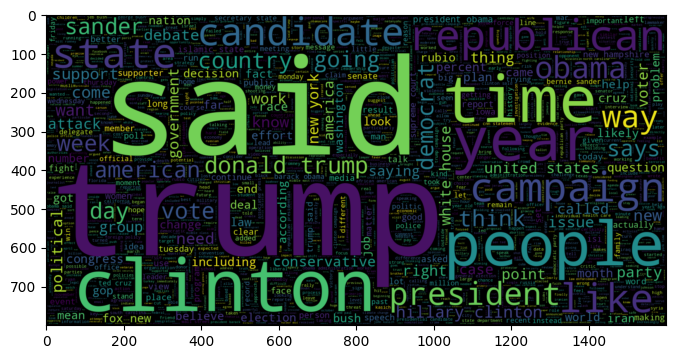

In [19]:
#word cloud visulization to reflect most common words in articles
plt.figure(figsize = (8,5)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 'REAL'].processed_text_merge))
plt.imshow(wc, interpolation = 'bilinear')

In [20]:
df

,title,text,label,text_merge,processed_text_merge
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary fear daniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan committed politic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,kerry paris gesture sympathy secretary state j...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,bernie supporters twitter erupt anger dnc trie...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,battle new york primary matters primary day ne...
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...,state department says emails clinton specialis...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,pbs stand plutocratic pentagon pbs stand pluto...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...,anti trump protesters tools oligarchy informat...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se...",ethiopia obama seeks progress peace security e...


In [21]:
#df['processed_title_merge'].dtype.kind in 'iufc'
df['processed_text_merge'].dtype.kind in 'iufc'

False

Stemming and tokenization

In [22]:
#apply word tokenization and stemming to split text into words 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

stop_words = stopwords.words('english')

def tokenize(text):
    tokens = word_tokenize(str(text))
    # words = [w for w in tokens if w.isalnum()]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(str(w)) for w in tokens if w.isalnum() and w not in stop_words] #pick only alphabets and numbers, not punctuation
    return ' '.join(str(stems))


  
# tokens = word_tokenize(str(df['processed_text_merge']))
# words = [w for w in tokens if w.isalnum() and w not in stop_words]
#tokens = word_tokenize(str(df['processed_text_merge']))

# print(words)
# for i in df['processed_text_merge']:
#   df['processed_text_merge'][i] = 

df['processed_text_merge_token'] = df['processed_text_merge'].apply(lambda x: tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df.head()

,title,text,label,text_merge,processed_text_merge,processed_text_merge_token
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...,smell hillary fear daniel greenfield shillman ...,"[ ' s m e l l ' , ' h i l l a r i ' , ' f ..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...,watch exact moment paul ryan committed politic...,"[ ' w a t c h ' , ' e x a c t ' , ' m o m ..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....,kerry paris gesture sympathy secretary state j...,"[ ' k e r r i ' , ' p a r i ' , ' g e s t ..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...,bernie supporters twitter erupt anger dnc trie...,"[ ' b e r n i ' , ' s u p p o r t ' , ' t ..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...,battle new york primary matters primary day ne...,"[ ' b a t t l ' , ' n e w ' , ' y o r k ' ..."


Feature extraction using Term Frequency Identity vectorization to know how importance a word is in a document

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vector = TfidfVectorizer(sublinear_tf=True)
tf_vector.fit(df['processed_text_merge'])

TfidfVectorizer(sublinear_tf=True)

Split into features and target

In [25]:
X = tf_vector.transform(df['processed_text_merge'].ravel()) #ravel() converts matrix to array
y = np.array(df['label'].ravel())

In [26]:
#encode target variables to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
le.transform(y)

array([0, 0, 1, ..., 0, 1, 1])

# Model Building

Data Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

In [29]:
from sklearn.svm import SVC
#1m, 93.21% no stemming - 94.24.
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
score = accuracy_score(y_test, y_pred_svc)
print(f'SVM Accuracy: {round(score*100,2)}%')

print(f"SVM Classification Report : \n\n{classification_report(y_test, y_pred_svc)}")

SVM Accuracy: 94.71%
SVM Classification Report : 

              precision    recall  f1-score   support

        FAKE       0.94      0.96      0.95       628
        REAL       0.96      0.94      0.95       639

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier 
#1m no stemming 91.79 to 95.19%, 94.95
model_passive = PassiveAggressiveClassifier(C = 0.1, random_state = 5)
model_passive.fit(X_train, y_train)
y_pred_passive = model_passive.predict(X_test)
score_passive = accuracy_score(y_test, y_pred_passive)
print(f'Passive Aggressive Accuracy: {round(score_passive*100,2)}%')

print(f"Passive Aggressive Classification Report : \n\n{classification_report(y_test, y_pred_passive)}")
#print(clf.score(X_test_std, y_test))

Passive Aggressive Accuracy: 95.5%
Passive Aggressive Classification Report : 

              precision    recall  f1-score   support

        FAKE       0.95      0.96      0.95       628
        REAL       0.96      0.95      0.96       639

    accuracy                           0.96      1267
   macro avg       0.96      0.96      0.96      1267
weighted avg       0.96      0.96      0.96      1267



In [31]:
from sklearn.naive_bayes import MultinomialNB
#77.82 to 82.47%, 18sec
model_naive = MultinomialNB(alpha=0.1)
model_naive.fit(X_train.toarray(), y_train)
y_pred_naive = model_naive.predict(X_test.toarray())

score_naive = accuracy_score(y_test, y_pred_naive)
print(f'Naive Bayes Accuracy: {round(score_naive*100,2)}%')

print(f"Naive Bayes Classification Report : \n\n{classification_report(y_test, y_pred_naive)}")

Naive Bayes Accuracy: 90.45%
Naive Bayes Classification Report : 

              precision    recall  f1-score   support

        FAKE       0.93      0.87      0.90       628
        REAL       0.88      0.94      0.91       639

    accuracy                           0.90      1267
   macro avg       0.91      0.90      0.90      1267
weighted avg       0.91      0.90      0.90      1267



Text(0.5, 25.722222222222214, 'Predicted label')

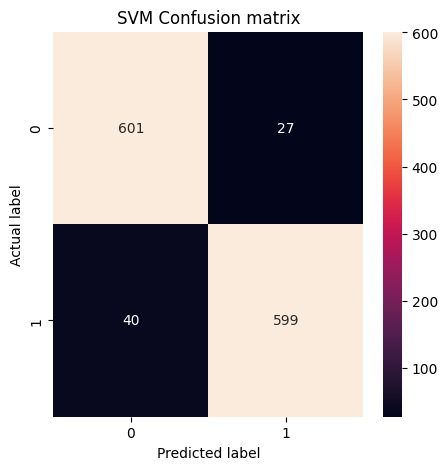

In [32]:
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

conf_mat_svc = confusion_matrix(y_test, y_pred_svc)  #> prediction_threshold)
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat_svc, annot=True, fmt="d")
plt.title('SVM Confusion matrix')
#plt.title('Confusion matrix @{:.2f}'.format(prediction_threshold))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# print('Genuine Transactions Detected (True Negatives): ', conf_mat[0][0])
# print('Genuine Transactions Incorrectly Detected (False Positives): ', conf_mat[0][1])
# print('Fake Transactions Missed (False Negatives): ', conf_mat[1][0])
# print('Fake Transactions Detected (True Positives): ', conf_mat[1][1])
# print('Total Fake Transactions: ', np.sum(conf_mat[1]))

Text(0.5, 25.722222222222214, 'Predicted label')

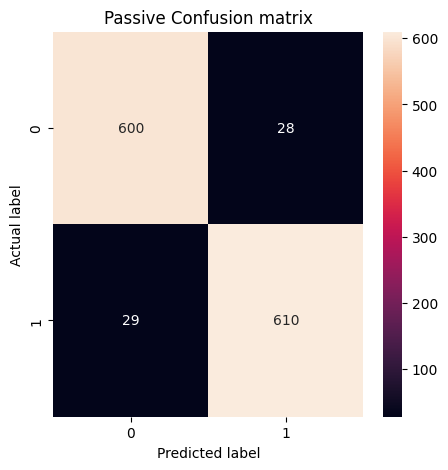

In [33]:
conf_mat_passive = confusion_matrix(y_test, y_pred_passive)  #> prediction_threshold)
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat_passive, annot=True, fmt="d")
plt.title('Passive Confusion matrix')
#plt.title('Confusion matrix @{:.2f}'.format(prediction_threshold))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 25.722222222222214, 'Predicted label')

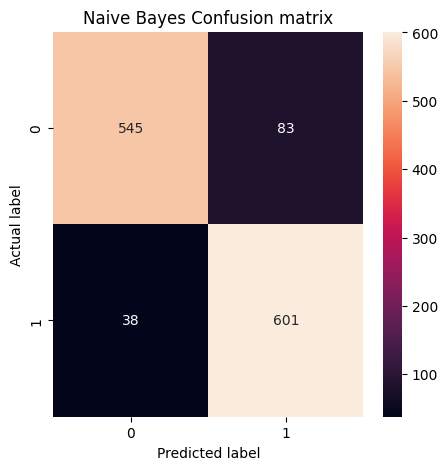

In [34]:
conf_mat_naive = confusion_matrix(y_test, y_pred_naive)  #> prediction_threshold)
plt.figure(figsize=(5,5))
sns.heatmap(conf_mat_naive, annot=True, fmt="d")
plt.title('Naive Bayes Confusion matrix')
#plt.title('Confusion matrix @{:.2f}'.format(prediction_threshold))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
#auc_score_svc = roc_auc_score(y_test, y_pred_svc)